In [1]:
#load our data set
import pandas as pd
data = pd.read_csv('Tweets.csv')

In [2]:
#treating with null values
# delete columns which have more than 90% missing data as they will not provide any constructive information.

missing_val = data.isnull().sum()
missing_percentage = (missing_val / len(data))*100

print("missing value: ", missing_val)
print("\n missing percentage: ", missing_percentage)

missing value:  tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

 missing percentage:  tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421


In [3]:
#Drop more than 90% missing data
missing_columns = missing_percentage[missing_percentage > 90].index
clean_data = data.drop(missing_columns, axis=1)

print("Droped columns: ", missing_columns)

Droped columns:  Index(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], dtype='object')


In [4]:
#plot: Count of Reasons for each airline
import matplotlib.pyplot as plt


In [5]:
airlines = data['airline'].unique()
airlines_counts = data['airline'].value_counts()
print(airlines)

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [6]:
airlines_negetive_reasons = {}
for airline in airlines:
    reasons = data[data['airline'] == airline]['negativereason']
    airlines_negetive_reasons[airline] = reasons

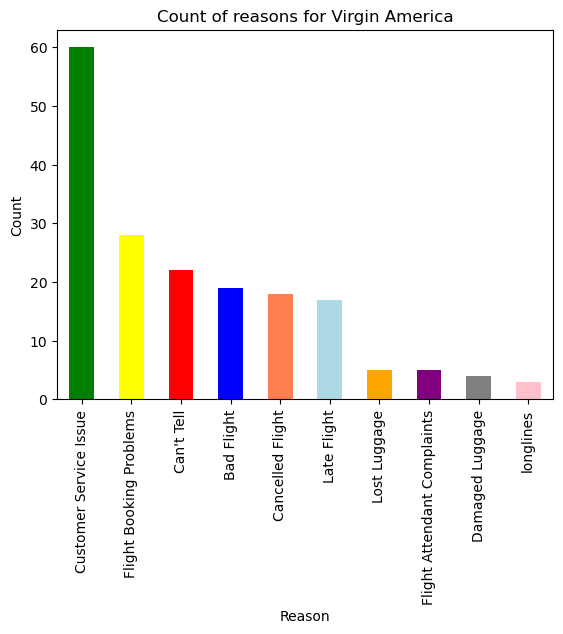

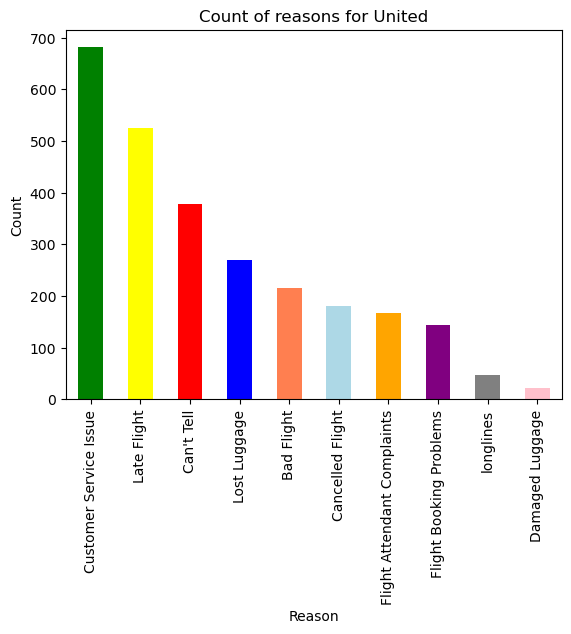

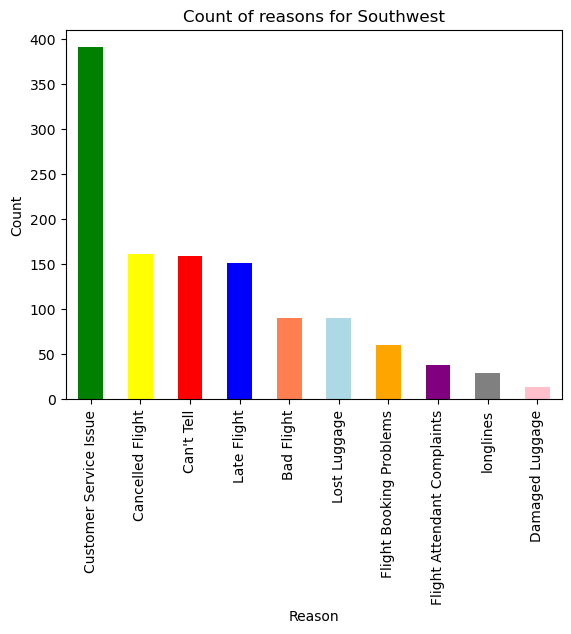

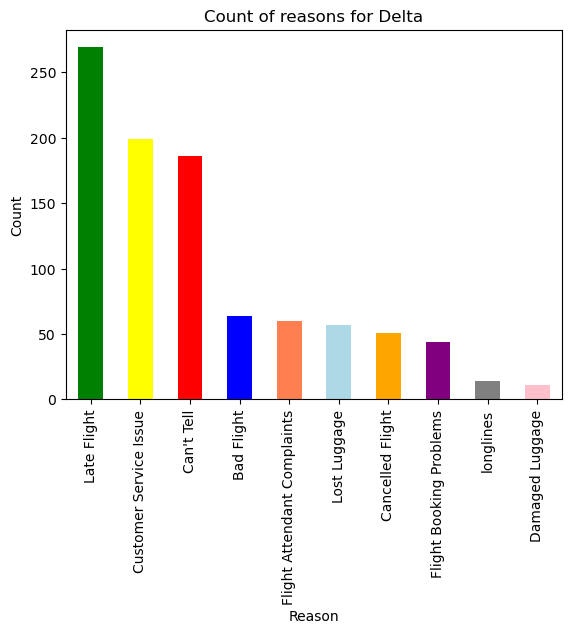

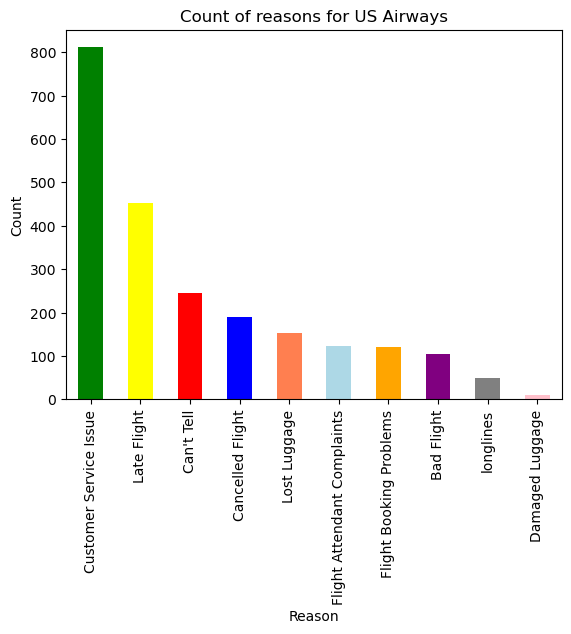

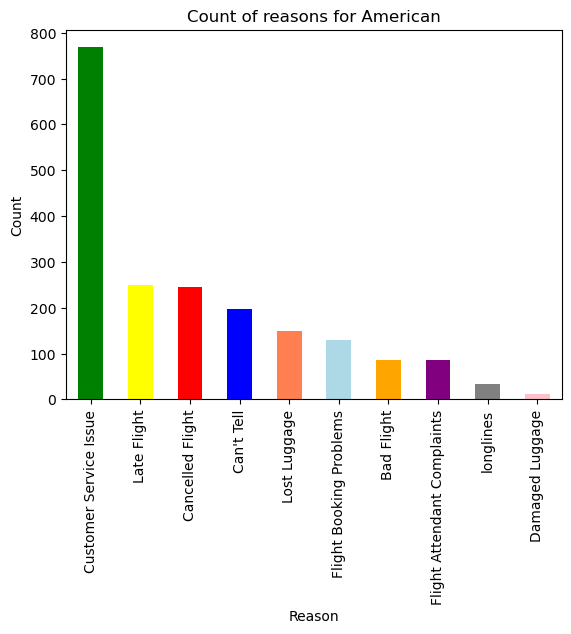

In [7]:
for airline, reason in airlines_negetive_reasons.items():
    
    reasons_counts = reason.value_counts()
    bar_color = ['green', 'yellow', 'red', 'blue', 'coral', 'lightblue', 'orange', 'purple', 'gray', 'pink']
    reasons_counts.plot(kind = 'bar', color=bar_color)
    
    plt.xlabel('Reason')
    plt.ylabel('Count')
    plt.title('Count of reasons for '+airline)
    
    plt.show()

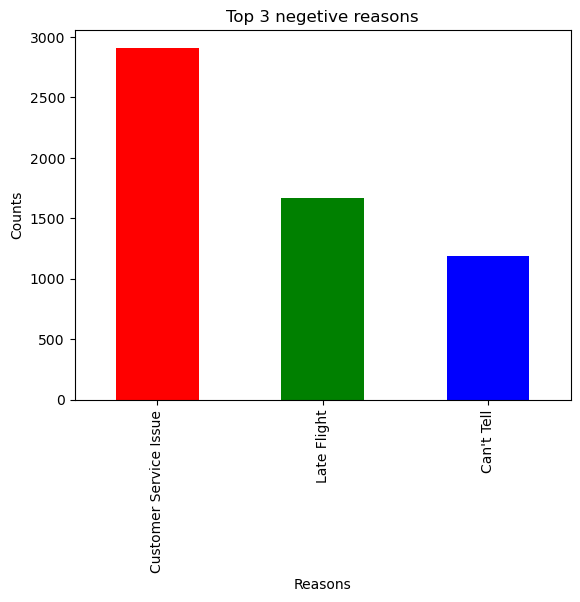

In [8]:
#Top 3 Negative reason Reasons:
reasons_counts = data['negativereason'].value_counts()

reasons_counts[0:3].plot(kind='bar', color=['r', 'g', 'b'])
plt.xlabel('Reasons')
plt.ylabel('Counts')
plt.title('Top 3 negetive reasons')

plt.show()

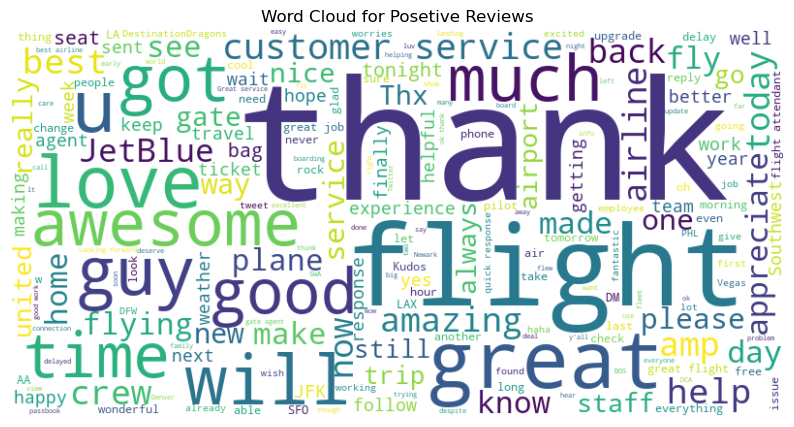

In [9]:
#Wordcloud for positive reasons
from wordcloud import WordCloud, STOPWORDS

new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

posetive_text = cleaned_word

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(posetive_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Posetive Reviews')
plt.show()


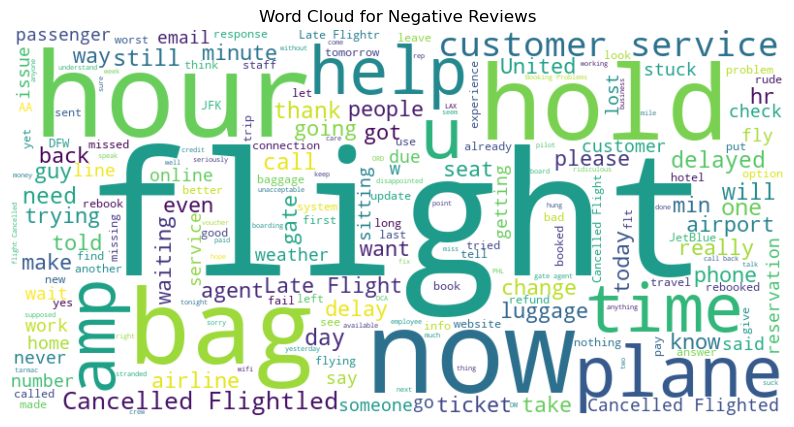

In [10]:
#Wordcloud for negative reasons
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

negative_text = cleaned_word

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


# Pre-Processing 


In [11]:
#Preprocessing the tweet text data
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
# Remove stop words
def remove_stopwords(data):
  
    data =list(data)
    new_data =[]
    
    
    for l in range(len(data)):
        line = data[l]
        line = line.lower()
        line=' '.join(word for word in line.split() if not word.startswith('@'))
        querywords = line.split()  
        resultwords  = [word for word in querywords if word not in stop_words]
        resultwords2  = [word for word in resultwords if word not in airlines]

        newline = ' '.join(resultwords2)       
        newline = newline.translate(str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
        new_data.append(newline)
        
    return new_data

In [14]:
#Dropng the rows with neutral sentiments
non_neutral_data = data[data['airline_sentiment'] != 'neutral'].copy()

In [15]:
#Store the two nessecary columns dataframe  
non_neutral_data['text'] = remove_stopwords(non_neutral_data['text'])  # apply preprocessing step 
Modified_data= pd.DataFrame()
Modified_data = non_neutral_data[['text', 'airline_sentiment']].copy()
Modified_data.head()

,text,airline_sentiment
1,plus added commercials experience tacky,positive
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
5,seriously would pay 30 flight seats playing re...,negative
6,yes nearly every time fly vx “ear worm” won’t ...,positive


In [16]:
# Map airline_sentiment values to numerical values
sentiments = non_neutral_data['airline_sentiment'].astype('category').cat.categories.tolist()
replace_map = {'airline_sentiment' : {k: v for k,v in zip(sentiments,list(range(0,len(sentiments))))}}
print(replace_map)

Modified_data.replace(replace_map, inplace=True)
Modified_data.head()

{'airline_sentiment': {'negative': 0, 'positive': 1}}


,text,airline_sentiment
1,plus added commercials experience tacky,1
3,really aggressive blast obnoxious entertainmen...,0
4,really big bad thing,0
5,seriously would pay 30 flight seats playing re...,0
6,yes nearly every time fly vx “ear worm” won’t ...,1



# Splitting data to train and test


In [17]:
from sklearn.model_selection import train_test_split

X = Modified_data['text'].values
y = Modified_data['airline_sentiment'].values

#split the data in the standard 80,20 ratio for train and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split the data in the standard 80,20 ratio for train and validation
# random_state=42
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(X_train)
x_val_dtm = vect.transform(X_val)
x_test_dtm = vect.transform(X_test)
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)


In [19]:
#Building SVM Classifier
# change the value of c in [0.01 , 1 , 100] in linear model
# ploynimial degree in [1 , 3 , 5]
# change the value of gamma in ['auto','scale', 3/n , 6/n] , n= number of samples in the dataset
# use 5-fold cross validation
# use grid search to find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svm_classifier = svm.SVC
    

# Perform grid search with cross-validation

# Get the best parameters and accuracy score


# Train the SVM model with the best parameters


# Evaluate the best model on the test set


# Print the best parameters and accuracy score

# print("Best Parameters:", best_params)
# print("Best Accuracy Score:", best_score)
# print("Test Accuracy:", accuracy)




In [20]:
N, D = x_train_dtm.shape

# Define SVM models with differant kernels: RBF, polynomial, linear
svc_rbf = svm_classifier(kernel='rbf')
svc_poly = svm_classifier(kernel='poly')
svc_linear = svm_classifier(kernel='linear')

# Define hyperparameters for grid search
params_rbf = {'C': [0.01, 1, 100], 'gamma': ['auto', 'scale', 3/len(X), 6/len(X)]}
params_poly = {'C': [0.01, 1, 100], 'degree': [1, 3, 5]}
params_linear = {'C': [0.01, 1, 100]}

In [ ]:
# Grid search with cross validation for linear model
optimal_linear= GridSearchCV(svc_linear, params_linear, cv=5, scoring='accuracy', verbose=2, error_score='raise')

#Fit models on training data for linear model
optimal_linear.fit(x_train_dtm, y_train)

#Estimate optimal parameters
linear_best_params = optimal_linear.best_params_

print("linear: ",linear_best_params,"\n")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END .............................................C=0.01; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END .............................................C=0.01; total time=   1.3s
[CV] END .............................................C=0.01; total time=   1.4s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ..............................................C=100; total time=   1.1s
[CV] END ..............................................C=100; total time=   1.2s
[CV] END ..............................................C=100; total time=   1.4s
[CV] END ..............................................C=100; total time=   1.3s
[CV] END ..............................................C=100; total time=   1.1s
linear:  {'C': 1} 

In [ ]:
# Grid search with cross validation for polynomial Kernel
optimal_poly= GridSearchCV(svc_poly, params_poly, cv=5, scoring='accuracy', verbose=2, error_score='raise')

#Fit models on training data for polynomial kernel
optimal_poly.fit(x_train_dtm, y_train)

#Estimate optimal parameters for C --> Linear SVM regularization
poly_best_params = optimal_poly.best_params_

print("polynomial: ",poly_best_params,"\n")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................................C=0.01, degree=1; total time=   1.9s
[CV] END ...................................C=0.01, degree=1; total time=   1.5s
[CV] END ...................................C=0.01, degree=1; total time=   1.5s
[CV] END ...................................C=0.01, degree=1; total time=   1.5s
[CV] END ...................................C=0.01, degree=1; total time=   1.5s
[CV] END ...................................C=0.01, degree=3; total time=   3.3s
[CV] END ...................................C=0.01, degree=3; total time=   3.3s
[CV] END ...................................C=0.01, degree=3; total time=   3.3s
[CV] END ...................................C=0.01, degree=3; total time=   5.0s
[CV] END ...................................C=0.01, degree=3; total time=   3.3s
[CV] END ...................................C=0.01, degree=5; total time=   3.9s
[CV] END ...................................C=0.01, degree=5; total time=   3.8s
[CV] END ...................................C=0.01, degree=5; total time=   3.9s
[CV] END ...................................C=0.01, degree=5; total time=   4.0s
[CV] END ...................................C=0.01, degree=5; total time=   3.7s
[CV] END ......................................C=1, degree=1; total time=   1.3s
[CV] END ......................................C=1, degree=1; total time=   1.3s
[CV] END ......................................C=1, degree=1; total time=   1.3s
[CV] END ......................................C=1, degree=1; total time=   1.2s
[CV] END ......................................C=1, degree=1; total time=   1.3s
[CV] END ......................................C=1, degree=3; total time=   3.7s
[CV] END ......................................C=1, degree=3; total time=   3.7s
[CV] END ......................................C=1, degree=3; total time=   3.7s
[CV] END ......................................C=1, degree=3; total time=   3.7s
[CV] END ......................................C=1, degree=3; total time=   3.9s
[CV] END ......................................C=1, degree=5; total time=   4.1s
[CV] END ......................................C=1, degree=5; total time=   4.0s
[CV] END ......................................C=1, degree=5; total time=   4.1s
[CV] END ......................................C=1, degree=5; total time=   4.1s
[CV] END ......................................C=1, degree=5; total time=   4.2s
[CV] END ....................................C=100, degree=1; total time=   1.7s
[CV] END ....................................C=100, degree=1; total time=   1.3s
[CV] END ....................................C=100, degree=1; total time=   1.3s
[CV] END ....................................C=100, degree=1; total time=   1.2s
[CV] END ....................................C=100, degree=1; total time=   1.2s
[CV] END ....................................C=100, degree=3; total time=   4.1s
[CV] END ....................................C=100, degree=3; total time=   6.9s
[CV] END ....................................C=100, degree=3; total time=   5.1s
[CV] END ....................................C=100, degree=3; total time=   6.1s
[CV] END ....................................C=100, degree=3; total time=   3.8s
[CV] END ....................................C=100, degree=5; total time=   4.4s
[CV] END ....................................C=100, degree=5; total time=   4.4s
[CV] END ....................................C=100, degree=5; total time=   4.4s
[CV] END ....................................C=100, degree=5; total time=   4.4s
[CV] END ....................................C=100, degree=5; total time=   4.4s
polynomial:  {'C': 1, 'degree': 1} 

In [ ]:
# Grid search with cross validation for RBF Kernel
optimal_rbf= GridSearchCV(svc_rbf, params_rbf, cv=5, scoring='accuracy', verbose=2, error_score='raise')

#Fit models on training data for polynomial kernel
optimal_rbf.fit(x_train_dtm, y_train)

#Estimate optimal parameters for C --> Linear SVM regularization
rbf_best_params = optimal_rbf.best_params_

print("RBF: ",rbf_best_params,"\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................................C=0.01, gamma=auto; total time=   1.3s
[CV] END .................................C=0.01, gamma=auto; total time=   1.3s
[CV] END .................................C=0.01, gamma=auto; total time=   1.3s
[CV] END .................................C=0.01, gamma=auto; total time=   1.4s
[CV] END .................................C=0.01, gamma=auto; total time=   1.3s
[CV] END ................................C=0.01, gamma=scale; total time=   1.7s
[CV] END ................................C=0.01, gamma=scale; total time=   1.9s
[CV] END ................................C=0.01, gamma=scale; total time=   1.5s
[CV] END ................................C=0.01, gamma=scale; total time=   1.8s
[CV] END ................................C=0.01, gamma=scale; total time=   1.6s
[CV] END ................C=0.01, gamma=0.0002599428125812321; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0002599428125812321; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0002599428125812321; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0002599428125812321; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0002599428125812321; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0005198856251624642; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0005198856251624642; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0005198856251624642; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0005198856251624642; total time=   1.3s
[CV] END ................C=0.01, gamma=0.0005198856251624642; total time=   1.4s
[CV] END ....................................C=1, gamma=auto; total time=   1.5s
[CV] END ....................................C=1, gamma=auto; total time=   1.5s
[CV] END ....................................C=1, gamma=auto; total time=   1.7s
[CV] END ....................................C=1, gamma=auto; total time=   1.4s
[CV] END ....................................C=1, gamma=auto; total time=   1.7s
[CV] END ...................................C=1, gamma=scale; total time=   2.1s
[CV] END ...................................C=1, gamma=scale; total time=   2.3s
[CV] END ...................................C=1, gamma=scale; total time=   2.5s
[CV] END ...................................C=1, gamma=scale; total time=   2.0s
[CV] END ...................................C=1, gamma=scale; total time=   2.1s
[CV] END ...................C=1, gamma=0.0002599428125812321; total time=   1.4s
[CV] END ...................C=1, gamma=0.0002599428125812321; total time=   1.4s
[CV] END ...................C=1, gamma=0.0002599428125812321; total time=   1.4s
[CV] END ...................C=1, gamma=0.0002599428125812321; total time=   1.4s
[CV] END ...................C=1, gamma=0.0002599428125812321; total time=   1.4s
[CV] END ...................C=1, gamma=0.0005198856251624642; total time=   1.5s
[CV] END ...................C=1, gamma=0.0005198856251624642; total time=   1.6s
[CV] END ...................C=1, gamma=0.0005198856251624642; total time=   1.7s
[CV] END ...................C=1, gamma=0.0005198856251624642; total time=   1.5s
[CV] END ...................C=1, gamma=0.0005198856251624642; total time=   1.4s
[CV] END ..................................C=100, gamma=auto; total time=   1.4s
[CV] END ..................................C=100, gamma=auto; total time=   1.5s
[CV] END ..................................C=100, gamma=auto; total time=   1.4s
[CV] END ..................................C=100, gamma=auto; total time=   1.4s
[CV] END ..................................C=100, gamma=auto; total time=   1.4s
[CV] END .................................C=100, gamma=scale; total time=   2.7s
[CV] END .................................C=100, gamma=scale; total time=   2.7s
[CV] END .................................C=100, gamma=scale; total time=   2.7s
[CV] END .................................C=100, gamma=scale; total time=   2.7s
[CV] END .................................C=100, gamma=scale; total time=   2.6s
[CV] END .................C=100, gamma=0.0002599428125812321; total time=   1.3s
[CV] END .................C=100, gamma=0.0002599428125812321; total time=   2.5s
[CV] END .................C=100, gamma=0.0002599428125812321; total time=   1.9s
[CV] END .................C=100, gamma=0.0002599428125812321; total time=   1.5s
[CV] END .................C=100, gamma=0.0002599428125812321; total time=   1.3s
[CV] END .................C=100, gamma=0.0005198856251624642; total time=   1.3s
[CV] END .................C=100, gamma=0.0005198856251624642; total time=   2.6s
[CV] END .................C=100, gamma=0.0005198856251624642; total time=   1.2s
[CV] END .................C=100, gamma=0.0005198856251624642; total time=   1.2s
[CV] END .................C=100, gamma=0.0005198856251624642; total time=   1.3s
RBF:  {'C': 100, 'gamma': 'scale'} 


In [ ]:
#accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

#Define acc for linear model based on optimal parameter of c=1
svm_linear_model = svm_classifier(C=1, kernel='linear')
svm_linear_model.fit(x_train_dtm, y_train)

#Evaluate the model on the validation set
val_y_pred = svm_linear_model.predict(x_val_dtm)
validation_score = accuracy_score(y_val, val_y_pred)

y_pred = svm_linear_model.predict(x_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"linear model validation score based on optimal params:", validation_score )
print(f"linear model accuracy based on optimal params:", accuracy )
# Present confusion matrix for the linear model
print(f"Confusion matrix for linear model:\n{conf_matrix}")

linear model validation score based on optimal params: 0.8982133188955063
linear model accuracy based on optimal params: 0.8943265482893027
Confusion matrix for linear model:
[[1748  114]
 [ 130  317]]

In [ ]:
#Define acc for polynomial kernel based on optimal parameter of c=1, degree=1
svm_poly_model = svm_classifier(C=1, degree=1, kernel='poly')
svm_poly_model.fit(x_train_dtm, y_train)

#Evaluate the model on the validation set
val_y_pred = svm_poly_model.predict(x_val_dtm)
validation_score = accuracy_score(y_val, val_y_pred)

y_pred = svm_poly_model.predict(x_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"polynomial kernel SVM model validation score based on optimal params:", validation_score )
print(f"polynomial kernel SVM model accuracy based on optimal params:", accuracy )

# Present confusion matrix for the linear model
print(f"Confusion matrix for polynomial model:\n{conf_matrix}")

polynomial kernel SVM model validation score based on optimal params: 0.9009204114780726
polynomial kernel SVM model accuracy based on optimal params: 0.9012559549588567
Confusion matrix for polynomial model:
[[1798   64]
 [ 164  283]]

In [ ]:
#Define acc for RBF kernel based on optimal parameter of c=100, gamma=scale
svm_rbf_model = svm_classifier(C=100, gamma='scale', kernel='rbf')
svm_rbf_model.fit(x_train_dtm, y_train)

#Evaluate the model on the validation set
val_y_pred = svm_rbf_model.predict(x_val_dtm)
validation_score = accuracy_score(y_val, val_y_pred)

y_pred = svm_rbf_model.predict(x_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"RBF kernel SVM model validation score based on optimal params:", validation_score )
print(f"RBF kernel SVM model accuracy based on optimal params:", accuracy )

# Present confusion matrix for the linear model
print(f"Confusion matrix for RBF model:\n{conf_matrix}")

RBF kernel SVM model validation score based on optimal params: 0.9009204114780726
RBF kernel SVM model accuracy based on optimal params: 0.9038544824599394
Confusion matrix for RBF model:
[[1783   79]
 [ 143  304]]

In [43]:
print("\U0001F98D"*30)

🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍🦍


# Report

##### Best model: RBF
based on above all accuracy obtained from different kernel model based on optimal hyperparameters the RBF model shows best accuracy with hyperparmeters C=100, gamma=scale

##### Data preproccessing:
after loading and explority analysis which are obvious, we need to pre process data:
firs i eliminate stopword which contains characters don't have certain meaning and dont't have effect on sentiment of the text so we can reduce unnessecary analysis.
then i omit neutral labeled rows to have binary classification and we want to predict posetive and negative sentiment of text.
after that beacouse other feature except tweet text does'nt effect on text sentiment i eliminate all those features and create a copy of tweet text and their labels and on this new framework, i splitted data into training, validation and test datasets

##### Compairing Models
As i mentioned earlier RBF shows the best accuracy with optimal parameters all optimal parameter vs every kernel model printed above.
from confusion matrix in linear model it shows posetive sentiments were totally 330 and percentage of true predition is near 70% and for negetive sentiment true prediction percentage is 94% 
for polynomial model 97% of negetive sentiment prediction was correct and 63% of posetive prediction was correct which is the lowest one among other models
AND for RBF, 97% of negetive predictions were correct and 69% of posetive predictions were true which is the best result.